# Numpy

**OBJETIVO**: O objetivo deste notebook é explicar como a biblioteca numpy funciona e as principais operações com arrays

---

In [ ]:
import os
import numpy as np
import pandas as pd

from pathlib import Path

%config Completer.use_jedi = False

---

## Criação 

Arrays são objetos que armazenam estruturas sequencias de dados de tipo e tamanhos determinado que apontam para uma sequência de dados na memória RAM. Em Python, a biblioteca que lida com essas estruturas é o Numpy que não só oferece as funcionalidades clássicas de um array (que pode ser vista em C, C++, Java, ...), mas também propriedades vetoriais utilizadas em operações de algebra linear

Criar um array é uma tarefa simples, que pode ser realizada por meio de uma lista como abaixo

In [ ]:
array = np.array([1, 2, 3, 4, 5])
array

In [ ]:
matriz = np.array([[1, 2, 3], [4, 5, 6]])
matriz

Ao fazer isso estaremos alocando os valores selecionados dentro da RAM do computador em endereços sequenciais, igualmente espaçados de acordo com o tipo de dado do array.

<img src="https://miro.medium.com/max/497/1*-ImKrqrT14UlG6wMpAEIJQ.png" />

Dados isso é fácil perceber que um array tem as seguintes características que podem ser acessadas na forma de atributos deste objeto:

- dtype: O tipo de dados do array
- shape: O tamanho do array em linhas e colunas
- size: O tamanho do array em quantidade de elementos
- itemsize: O consumo de memória de cada elemento do array (em bytes)
- strides: Uma distancia em bytes entre os elementos armazenados na memória

In [ ]:
print(
    f"array: dtype={array.dtype} | shape={array.shape}| size={array.size} "
    f"| itemsize={array.itemsize} | strides={array.strides}"
)

print(
    f"matriz: dtype={matriz.dtype} | shape={matriz.shape} | size={matriz.size} "
    f"| itemsize={matriz.itemsize} | strides={matriz.strides}"
)

Dado que inicializações de diferentes tipos de array são bastante comuns, a biblioteca contém uma série de funcionalidades que permitem criar arrays com diferentes tipos de dados

**np.zeros** -> Cria um array preenchido com zeros

In [ ]:
np.zeros(shape=(3, 2))

**np.ones** -> Cria um array preenchido com um's

In [ ]:
np.ones(shape=(3, ))

**np.eye** -> Cria a matriz identidade com o tamanho específicado

In [ ]:
np.eye(4)

**np.arange** -> Mesma coisa que a função range, só que para arrays

In [ ]:
np.arange(1, 10, 2)

**np.linspace** -> Cria um array entre dois números espaçados linearmente

In [ ]:
np.linspace(5, 10, num=5)

**np.logspace** -> Cria um array entre dois números espaçados logaritimicamente

In [ ]:
np.logspace(0, 1, 3)

**np.random.int** -> Cria um array de valores aleatóries entre um valor menor e maior (exclusivo)

In [ ]:
np.random.randint(0, 10, size=(5, 5))

**np.random.normal** -> Cria um array aleatório com valores baseados em uma distribuição normal

In [ ]:
np.random.normal(1, 2, 10)

É interassante notar que algumas dessas funções não permitem passar o tamanho do array (como np.arange), por isso muitas vezes é comum combina-las com o método reshape

In [ ]:
a = np.arange(12)
a = a.reshape(3, 4)
a

---

**Exercício** 

Gere uma matriz 4x4 de números igualmente espaçados entre 5 e 11 e calcule o total de memória utilizado para armazenar este array

In [ ]:
#@title Resposta
arr = np.linspace(5, 11, num=16).reshape(4, 4)
print(arr)
print("Bytes:", arr.size * arr.itemsize)

---

## Tipagem

Uma das diferenças mais gritantes entre arrays e listas é sua tipagem. Enquanto listas podem conter múltiplos tipos de dados (inteiros, strings, floats, etc) arrays tendem a possuir tipagem fixa e tal tipagem pode ser modificada utilizando o método astype

In [ ]:
arr = np.array([1, 2, 3])
print(arr.dtype, arr)

In [ ]:
arr = np.array([1, 2, 3])
arr = arr.astype("float")
print(arr.dtype, arr)

In [ ]:
arr = np.array([1, 2, 3], dtype=np.uint8)
print(arr.dtype, arr)

In [ ]:
arr = np.array(["ola", 2.1, [2, 3, 4]], dtype="object")

In [ ]:
arr.shape

Abaixo temos a lista dos tipos de dados numéricos do numpy

<img src="https://miro.medium.com/max/1240/1*lbPigku_qn_NeKAHHTGYPg.png" />

---

**Exercício** 

Assumindo que você tenha um array de apenas inteiros, crie uma função que converte-o para o tipo de dado que minimiza seu uso de memória

In [ ]:
def minimiza_memoria(array: np.ndarray) -> np.ndarray:
    """
    Minimiza o uso de memório de um determinado array
    de inteiros
    
    :param array: array a ser minimizado
    :return: array com o tipo ajustado
    """
    pass


In [ ]:
#@title Resposta
def minimiza_memoria(array: np.ndarray) -> np.ndarray:
    """
    Minimiza o uso de memório de um determinado array
    de inteiros
    
    :param array: array a ser minimizado
    :return: array com o tipo ajustado
    """
    # cria um dicionário com o uso de memória por bytes
    uso = {
        8: 127,
        16: 32767,
        32: 2147483647,
    }
    
    # obtém os valores mínimos e máximos do array
    minimo = min(array)
    maximo = max(array)
    
    # cria os parâmetros para a seleção do tipo com base no
    # valor mínimo
    if minimo > 0:
        prefix = "u"
        menor = lambda m: 0
        maior = lambda m: 2 * m + 1
    else:
        prefix = ""
        menor = lambda m: -(m + 1)
        maior = lambda m: m
    
    # percorre os diferentes tipos de inteiro e seleciona o mais adequado
    for b, m in uso.items():
        if minimo >= menor(m) and maximo <= maior(m):
            return array.astype(f"{prefix}int{b}")
        
print(minimiza_memoria(np.array([1, 2, 3])).dtype)
print(minimiza_memoria(np.array([-1, 2, 3])).dtype)
print(minimiza_memoria(np.array([1, 2, 130])).dtype)
print(minimiza_memoria(np.array([-1, 2, 130])).dtype)

---

## Indexação 

Tal como listas arrays são objetos indexáveis de maneira similar, de forma que a sintaxe de chaves e os slices funcionam normalmente

In [ ]:
array = np.arange(1, 10)
matriz = np.random.normal(1, 2, (3, 3))

print(array)
print(matriz)

In [ ]:
array[0]

In [ ]:
matriz[2][-1]

In [ ]:
matriz[1]

In [ ]:
array[::-2]

Entretanto o numpy oferece uma maneira adicional de indexar elementos selecionando múltiplos indices por meio de uma lista

In [ ]:
array[1:3]

In [ ]:
array[[1, 2]]

Por fim, numpy nos oferece a flexibilidade, especialmente com matrizes, de selecionar os elementos de linhas e colunas em conjunto por meio da sintaxe de ",", na qual fornecemos dois slices, o primeiro selecionando linhas e o segundo selecionado colunas

In [ ]:
matriz[:, 1]

In [ ]:
matriz[1, 2]

In [ ]:
matriz[:, [1, 2]]

---

**Exercício**

Dado um vetor unidimensional de valores converta-o para uma matriz bi-dimensional com base em um valor de passo e um valor de janela, de tal forma que cada linha dessa matriz contenha o número de colunas definido na janela e que nós percorremos, a cada iteração, o número de passo em termos de elemento.

Por exemplo:

    Entrada > 
    array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
    Passo = 2
    Janela = 4
    
Geraria uma saída de:

    Saída > [[ 0  1  2  3]
             [ 2  3  4  5]
             [ 4  5  6  7]
             [ 6  7  8  9]
             [ 8  9 10 11]
             [10 11 12 13]
             [12 13 14 15]
             [14 15 16 17]]

Veja que cada linha contém 4 colunas = janelas. A primeira linha é formada por 0-3, ou seja, os 4 primeiros elementos do array, enquanto que a segunda linha é de 2-5, de forma que ela pula os 2 primeiros elementos (passo) e percorre mais 4 elementos (janela) do array

In [ ]:
#@title Resposta
def gera_matriz(array, passo=5, janela=5):
    n_iter = ((array.size - janela) // passo) + 1
    return np.array(
        [
            array[s:(s + janela)] 
            for s in np.arange(0, n_iter * passo, passo)
        ]
    )

print(gera_matriz(np.arange(19), passo=2, janela=4))

---

## Mutabilidade

Diferente de listas arrays são objetos imutáveis em tamanho e tipo (como você viu mais acima, para mudar o tipo de array nós criamos um novo)

In [ ]:
arr = np.array([1, 2, 3])
arr.append(4)

Entretanto, diferente de tuplas, arrays são mútaveis em conteúdo

In [ ]:
arr[2] = 5
arr

Ao tentar mudar o valor de um elemento o numpy o converterá para a tipagem adequada quando possível

In [ ]:
arr[1] = 1.7234
arr

In [ ]:
arr[1] = "3"
arr

In [ ]:
arr[1] = "3.2"
arr

É interessante notar como funciona a alocação de memória para transformações particulares do array que podem afetar sua mutabilidade. Por exemplo, suponhamos que temos os array a, b e c todos criados a partir de transformações do vetor a

In [ ]:
a = np.arange(12, dtype="int64")
b = a.reshape(3, 4)
c = a[::2]
print(a)
print(b)
print(c)

O que acontece, neste caso, se eu alterar o vetor a?

In [ ]:
a[0] = -1
print(a)
print(b)
print(c)

Veja que se altera os vetores b e c. Isso acontece porque na visão de memória esses vetores apontam para a mesma localização na RAM. Por exemplo os vetores a e b são compartilhados como no diagrama abaixo:

<img src="https://ajcr.net/images/stride-guide/array-anatomy.png" />

In [ ]:
print(f"a: dtype={a.dtype} | shape={a.shape} | size={a.size} | itemsize={a.itemsize} | strides={a.strides}")
print(f"b: dtype={b.dtype} | shape={b.shape} | size={b.size} | itemsize={b.itemsize} | strides={b.strides}")

Da mesma forma o vetor c é uma representação especial do vetor a, na qual mudamos o valor de passo entre elementos do array

<img src="https://ajcr.net/images/stride-guide/1d_array_a_getitem_step_2.png" />

In [ ]:
print(f"a: dtype={a.dtype} | shape={a.shape} | size={a.size} | itemsize={a.itemsize} | strides={a.strides}")
print(f"c: dtype={c.dtype} | shape={c.shape} | size={c.size} | itemsize={c.itemsize} | strides={c.strides}")

Por fim é importante lembrar que tal como listas e dicionário, arrays são passados como referência em função, de forma que qualquer alteração no array feito dentro de uma função será carregada para fora da mesma

In [ ]:
def muda_a(a):
  a[1] = 12890
print(a)
muda_a(a)
print(a)
print(b)
print(c)

---

**Exercício**

Crie uma função que permita criar uma matriz quadrada com os seguintes formatos:

    Q -> 1 1 1 1
         1 0 0 1
         1 0 0 1
         1 1 1 1
    V -> 1 0 0 1
         1 0 0 1
         1 0 0 1
         1 0 0 1
    H -> 1 1 1 1
         0 0 0 0
         0 0 0 0
         1 1 1 1
    P -> 0 0 0 0
         0 1 1 0
         0 1 1 0
         0 0 0 0

In [ ]:
#@title Resposta
def cria_array_formato(tamanho: int, fmt: str) -> np.ndarray:
    """
    Cria um array de acordo com o formato desejado que pode ser
    Q, V, H, P
    
    :param tamanho: tamanho do array
    :param fmt: formato desejado
    :return: array gerado
    """
    arr = np.zeros(shape=(tamanho, tamanho))
    
    if fmt in ["Q", "H"]:
        arr[0, :] = 1
        arr[-1, :] = 1
    if fmt in ["Q", "V"]:
        arr[:, 0] = 1
        arr[:, -1] = 1
    if fmt == "P":
        arr[1:-1, 1:-1] = 1
    
    return arr

print(cria_array_formato(5, "Q"))
print(cria_array_formato(5, "V"))
print(cria_array_formato(5, "H"))
print(cria_array_formato(5, "P"))

---

## Operações 

Como descrito anteriormente, numpy é uma biblioteca de algebra linear, de forma que suporta todas as operações vetoriais tradicionais

In [ ]:
np.random.seed(42)
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
m1 = np.random.randint(1, 10, size=(3, 3))
m2 = np.random.randint(1, 10, size=(3, 3))

print(m1)
print(m2)

Soma

In [ ]:
arr1 + arr2

In [ ]:
np.add(arr1, arr2)

Subtração

In [ ]:
arr1 - arr2

In [ ]:
np.subtract(arr1, arr2)

Multiplicação (escalar)

In [ ]:
arr1 * 2

In [ ]:
arr1 * 2.1

In [ ]:
np.multiply(arr1, 2)

Multiplicação (element-wise)

In [ ]:
arr1 * arr2

In [ ]:
np.multiply(arr1, arr2)

Multiplicação (produto vetorial)

In [ ]:
sum(arr1 * arr2)

In [ ]:
arr1.dot(arr2)

In [ ]:
np.dot(arr1, arr2)

Multiplicação (cruzada)

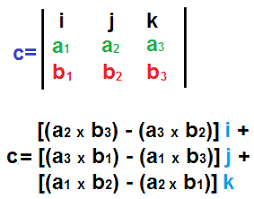

In [ ]:
np.cross(arr1, arr2)

Multiplicação (matricial)

<img src="https://www.geeksforgeeks.org/wp-content/uploads/strassen_new.png" />

In [ ]:
m1@m2

In [ ]:
np.matmul(m1, m2)

Divisão

In [ ]:
arr1 / arr2

In [ ]:
np.divide(arr1, arr2)

Exponenciação

In [ ]:
arr1 ** 2

In [ ]:
arr1 ** arr2

In [ ]:
np.power(arr1, arr2)

Módulo de um vetor

In [ ]:
sum(arr1 * arr1) ** 0.5

In [ ]:
np.linalg.norm(arr1)

Determinante de uma matriz

In [ ]:
np.linalg.det(m1)

Matriz inversa

In [ ]:
np.linalg.inv(m1)

Matriz transposta

In [ ]:
np.transpose(m1)

In [ ]:
m1.T

In [ ]:
arr1.T

Uma propriedade especial de arrays é "broadcasting", na qual uma operação pode ser propagada entre arrays de diferentes tamanhos contato que obdeçam algumas propriedades especificas. Por exemplo, podemos somar dois arrays de tamanho diferente, contato que possamos "reproduzir" um deles para ficar com o tamanho do outro

In [ ]:
arr3 = np.array([1, 2, 3, 4])

In [ ]:
arr3 + arr1

In [ ]:
arr3 = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
arr3 + arr1

In [ ]:
arr3 * arr1

Duas dimensões de arrays são compatíveis se (1) elas são iguais (2) uma delas é 1

Arrays que podem ser combinados

    A      (3d array): 256 x 256 x 3
    B      (1d array):             3
    Result (3d array): 256 x 256 x 3

    A      (4d array):  8 x 1 x 6 x 1
    B      (3d array):      7 x 1 x 5
    Result (4d array):  8 x 7 x 6 x 5

    A      (2d array):  5 x 4
    B      (1d array):      1
    Result (2d array):  5 x 4

    A      (2d array):  5 x 4
    B      (1d array):      4
    Result (2d array):  5 x 4

    A      (3d array):  15 x 3 x 5
    B      (3d array):  15 x 1 x 5
    Result (3d array):  15 x 3 x 5

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 5
    Result (3d array):  15 x 3 x 5

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 1
    Result (3d array):  15 x 3 x 5

Arrays que podem **NÃO** ser combinados:

    A      (1d array):  3
    B      (1d array):  4

    A      (2d array):      2 x 1
    B      (3d array):  8 x 4 x 3 # a dimensão 4 não combina com a 2

In [ ]:
x = np.arange(4)
xx = x.reshape(4, 1)
y = np.ones(5)
z = np.ones((3, 4))

# não é possível
# x + y

print((xx + y).shape)
print((xx + y))

print((x + z).shape)
print((x + z))

Para mais detalhes veja https://numpy.org/doc/stable/user/basics.broadcasting.html

---

**Exercício**

Calcule a distância euclidiana entre dois arrays

In [ ]:
np.random.seed(42)
a = np.random.random(size=3)
b = np.random.random(size=3)

In [ ]:
#@title Resposta
np.random.seed(42)
a = np.random.random(size=3)
b = np.random.random(size=3)
np.linalg.norm(a - b)

---

## Representações

Há alguns elementos matemáticos que possuem representações especiais no numpy. Abaixo listamos os principais

np.nan -> Not a Number, é a representação de um dado faltante

In [ ]:
arr = np.array([1, 2, np.nan, 4])
arr

In [ ]:
np.isnan(arr)

In [ ]:
np.zeros(3) / 0

É importante destacar que None e NaN não são a mesma coisa. Not a Number indica que é uma operação matemática ou um dado numérico não existente dentro de um array, enquanto None é o objeto nulo de Python.

In [ ]:
np.isnan(np.nan)

In [ ]:
np.isnan(None)

np.inf -> Infinito, representa valores infinitos

In [ ]:
arr = np.array([1, 2, np.inf, 4, -np.inf])
arr

In [ ]:
np.isfinite(arr)

In [ ]:
np.ones(3) / 0

Constantes numéricas:
- np.pi: 3.14 (constante PI)
- np.e: 2.72 (número de euler)

In [ ]:
np.pi

In [ ]:
np.e

---

## Filtros 

Uma particularidade interessante de arrays é a habilidade de realizar filtros de seus dados a partir de comparações booleanas.

In [ ]:
np.random.seed(42)
arr = np.random.randint(0, 100, size=10)
arr

Ao gerar uma comparação (tratando arrays como uma variável) o resultado é um array de booleanos com o resultado da comparação de cada elemento do array

In [ ]:
arr > 50

Essas comparações também aceitam os operadores lógicos and/or/not, entretanto os mesmos devem vir no formato &/|/~ (respectivamente) e, além disso, obrigatoriamente necessitam de () para cada operação lógica

In [ ]:
arr > 50 and arr < 75

In [ ]:
arr > 50 & arr < 75

In [ ]:
(arr > 50) & (arr < 75)

O filtro do array ocorre ao passar uma comparação como parte da sintaxe de chaves, de forma que é como se estivessemos indexando o array onde o resultado da comparação lógica é verdadeiro

In [ ]:
arr[(arr > 50) & (arr < 75)]

Uma função muito interessante criada com esse propósito é where, na qual espera-se receber como primeiro input um comparação e devolve como output os indices na qual a comparação é verdadeira

In [ ]:
np.where((arr > 50) & (arr < 75))

Alternativamente ainda podemos passar mais dois parâmetros para a função where, de tal forma que criaremos um novo array obtendo o segundo parametro como resultado onde a comparação é verdadeira e o terceiro onde a comparação é falsa

In [ ]:
np.where((arr > 50) & (arr < 75), "Papai Noel é Top", "Papai Noel é Gordo")

Nós inclusive conseguimos fazer alterações em arrays utilizando filtros

In [ ]:
arr[(arr > 50) & (arr < 75)] = -1
arr

Além dos comparadores lógicos entre elementos, o numpy ainda contém agregadores lógicos tais com as funções nativas de python all e any, na qual checamos se todos (all) elementos de uma sequência são verdadeiros ou se algum (any) dos elementos são verdadeiros

In [ ]:
np.random.seed(42)
arr = np.random.randint(0, 100, size=10)

print(arr)
print((arr > 50) & (arr < 75))

print(all((arr > 50) & (arr < 75)))
print(np.all((arr > 50) & (arr < 75)))

print(any((arr > 50) & (arr < 75)))
print(np.any((arr > 50) & (arr < 75)))

A vantagem dos operadores do numpy em contrapartida as funções do Python é a possibilidade de fazer isso em arrays multidimensionais, até mesmo selecionando eixos específicos

In [ ]:
arr.reshape(2, 5) < 70

<img src="https://predictivehacks.com/wp-content/uploads/2020/08/numpy_arrays-1024x572.png" width=400 height=300/>

In [ ]:
all(arr.reshape(2, 5) < 70)

In [ ]:
np.all(arr.reshape(2, 5) < 70)

In [ ]:
np.all(arr.reshape(2, 5) < 70, axis=0)

Por fim, vale destacar que as mesmas regras de broadcast que se aplicam a operações matemáticas se aplicam a operadores lógicos

In [ ]:
arr.reshape(2, 5) > np.array([20, 30, 40, 50, 60])

In [ ]:
arr.reshape(2, 5, 1) > np.array([20, 30, 40, 50, 60])

---

**Exercício**

Substitua todos os valores nulos de um array por 0

In [ ]:
np.random.seed(42)
array = np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.nan], size=(5, 5))

In [ ]:
#@title Resposta
np.random.seed(42)
array = np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, np.nan], size=(5, 5))
print(array)
array[np.isnan(array)] = 0
print(array)

**Exercício**

Dadas duas matrizes, A de dimensão 8x3 e B de dimensão 2x2, encontre as linhas de A que possuem algum elemento de ambas as linhas de B. Cada linha de A não precisa ter todos os elementos, mas ao menos 1 de cada linha, independente da ordem.

NOTA: Este exercício pode ser 100% resolvido com arrays. Pense com utilizar broadcasting a seu favor

Exemplo:

    A = [3, 4, 2]
        [4, 4, 1]
        [2, 2, 2]
        [4, 3, 2]
        [4, 1, 3]
        [1, 3, 4]
        [0, 3, 1]
        [4, 3, 0]
        
    B = [0, 2]
        [2, 1]
        
    0 -> contém 2 que está em ambas linhas de B
    1 -> não contém nenhum elemento da primeira linha de B
    2 -> contém 2 que está em ambas linhas de B
    3 -> contém 2 que está em ambas linhas de B
    4 -> não contém nenhum elemento da primeira linha de B
    5 -> não contém nenhum elemento da primeira linha de B
    6 -> contém 0 que está na primeira linha e 1 que está na segunda
    7 -> não contém nenhum elemento da segunda linha de B
    
    Saída = [0 2 3 6]

In [ ]:
np.random.seed(42)
A = np.random.randint(0, 5, (8, 3))
B = np.random.randint(0, 5, (2, 2))

In [ ]:
#@title Resposta
np.random.seed(42)
A = np.random.randint(0, 5, (8, 3))
B = np.random.randint(0, 5, (2, 2))

# ao fazer o reshape de A nós podemos compara-lo com b
# de forma que obteremos um array 8x3x2x2, no qual o que 
# obteremos é como se fosse a matriz B comparada a cada 
# elemento A
C = (A.reshape(8, 3, 1, 1) == B)

# em seguida nós precisamos garantir que nos eixos finais
# haja um elemento verdadeiro em cada linha. Para fazer isto
# bastaria usar a função any.
# Pensando sequencialmente any(3) deveria nos dar se o elemento
# da matriz A era parte de algum elemento de cada linha de B
# resultando numa matriz 8x3x2
# Depois se resumirmos os eixo 1, nós deveriamos obter uma matriz
# 8x2, que nos diz se há, em cada linha de A, algum elemento numa
# linha de B, para cada linha de B
# Por fim podemos executar all para garantir que todos a linha de
# A contenha elementos de todas as linhas de B
contem = C.any(3).any(1).all(1)

# por fim o np.where vai nos devolver os indices das linhas na qual
# encontramos uma condição verdadeira
linhas = np.where(contem)[0]

print(linhas)

---

## Funções 

Ao longo das sessões anteriores nós já vimos uma série de funcionalidades úteis que podem ser utilizadas para realizar cálculos especiais, como np.cross, np.isnan e assim vai. O Numpy é recheado dessas funções que nos ajudam a realizar todo o tipo de calculo, como algebra linear, estatística, funções matemáticas e mais.

Poderíamos passar horas apenas só falando sobre essas diferentes funções, mas é verdade é que nós vamos nos familiarizando com elas conforme vamos aplicando-as em diferentes contexto.

Abaixo nós agrupamos as funções que esperamos encontrar mais recorrentemente em nossos cálculos e colocamos alguns exemplos de como elas funcionam, além de alguns exercícios.

In [ ]:
np.random.seed(42)
A = np.random.normal(loc=5, size=(5, 3))
B = np.random.choice(["A", "B", "C"], size=(5, 3))
C = np.array([0, 1, 2, 0, 4, 5])
D = np.random.normal(size=(5, 3))

**Agregação**:
- np.mean: Calcula a média
- np.median: Calcula a mediana
- np.min: Calcula o valor mínimo
- np.max: Calcula o valor máximo
- np.std: Calcula o desvio-padrão
- np.var: Calcula a variância
- np.percentile: Calcula o percentil específicado
- np.sum: Calcula a soma de todos os elementos
- np.count_nonzero: Realiza a contagem dos elementos não nulos do array
- np.unique: Obtém os valores únicos de um array

In [ ]:
print(A, np.mean(A))

In [ ]:
print(A, np.mean(A, axis=1))

In [ ]:
print(A, np.percentile(A, 0.25))

In [ ]:
print(B, np.unique(B))

In [ ]:
print(C, C.shape, np.count_nonzero(C))

**Transformação**:

- np.ceil: Arredonda os valores de um array para cima
- np.floor: Arredonda os valores de um array para baixo
- np.round: Arredonda os valores de um array para as casas decimais desejadas
- np.trunc: Remove as casas decimais do valor numérico
- np.abs: Calcula o valor absoluto dos elementos
- np.sign: Obtém os sinais dos números de um array

In [ ]:
print(A, np.ceil(A))

In [ ]:
print(A, np.round(A, 2))

In [ ]:
print(A, np.trunc(A))

In [ ]:
print(D, np.sign(D))

**Função Matemática**: 

- np.exp: Realiza a exponenciação dos elementos
- np.log: Aplica o log sobre os elementos
- np.expm1: Aplica a função exp(x) - 1 sobre os elementos
- np.log1p: Aplica a função log(x + 1) sobre os elementos
- np.power: Eleva os elementos do array a uma potência
- np.sqrt: Extraí a raíz quadrada dos números de um array
- np.sin/cos/tan: Aplica a função seno/cosseno/tangente sobre os elementos
- np.asin/acos/atan: Aplica a função de arc seno/cosseno/tangente sobre os elementos

In [ ]:
np.log(A)

In [ ]:
np.sin(D)

**Elemento a Elemento**
- np.diff: Obtém a diferença entre valores sequenciais do array
- np.cumsum: Obtém a soma dos valores cumulativos
- np.cummin: Obtém o valor mínimo cumulativo do array
- np.cummax: Obtém o valor máximo cumulativo do array
- np.cumprod: Obtém o valor produto cumulativo do array

In [ ]:
print(C, np.diff(C))

In [ ]:
print(C, np.cumsum(C))

---

**Exercício**

Obtenha os indices do array onde ocorrem os máximos locais, isto é o maior valor de uma sequência crescente de valores. 

Para o array de exemplo, estes valores são os 7 e 6, que ocorrem nos indices 2 e 5.

In [ ]:
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

In [ ]:
#@title Resposta
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

# obtém as diferenças entre um valor e o valor anterior
diff = np.diff(a)
print(diff)

# extraí apenas o sinal da diferença, i.e. um array de 1 e -1
sign = np.sign(diff)
print(sign)

# obtém a diferença no valor de sinais.
# Se tivermos 0, significa que temos dois crescimentos ou decrescimentos seguidos
# Se tivermos 2, significa que há um decrescimento seguido de um crescimento
# Se tivermos -2, significa que há um crescimento seguido de um decrescimento
cres = np.diff(sign)
print(cres)

# os máximos locais ocorrem no indice do -2
max_local = np.where(cres == -2)[0] + 1
print(max_local)

**Exercício**

Crie uma função que calcule a média móvel de um array dado um tamanho de janela

In [ ]:
def media_movel(arr: np.ndarray, janela: int = 3) -> np.ndarray:
    """
    Calcula o valor da média movel de um array
    
    :param arr: array com valores a serem calculados
    :param janela: janela de cálculo
    :return: array com média móvel
    """
    pass

In [ ]:
#@title Resposta
def media_movel(arr: np.ndarray, janela: int = 3) -> np.ndarray:
    """
    Calcula o valor da média movel de um array
    
    :param arr: array com valores a serem calculados
    :param janela: janela de cálculo
    :return: array com média móvel
    """
    # calcula a soma cumulativa de valores
    soma = np.cumsum(arr)
    
    # aplica a diferença para obter a soma da janela
    soma[janela:] = soma[janela:] - soma[:-janela]
    
    # calcula o valor de média
    return soma[janela - 1:] / janela

media_movel(np.arange(20))

**Exercício**

Para a maioria dos algoritmos preditivos não é possível processar texto diretamente, apesar de ser fácil encontrar relações entre dados qualitativos e variáveis quantitativas (por exemplo 

One-hot encoding é um método de codificação de dados categóricos, na qual nós transformamos dados categóricos em flags 1 e 0 de acordo com cada dado categórico. Desta forma, por exemplo, se uma lista de valores tem 5 categorias possiveis, para cada linha gerariamos 5 colunas com valores 1 e 0 de acordo com a categoria.

Por exemplo se tivessemos

    array -> ["A", "A", "B", "A", "C", "B"]

Por meio do one-hot encoding obteriamos:
    
    array -> matriz ohe
              A  B  C
    A     -> [1, 0, 0]
    A     -> [1, 0, 0]
    B     -> [0, 1, 0]
    A     -> [1, 0, 0]
    C     -> [0, 0, 1]
    B     -> [0, 1, 0]

In [ ]:
arr = np.array(["A", "A", "B", "A", "C", "B"])

In [ ]:
#@title Resposta
arr = np.array(["A", "A", "B", "A", "C", "B"])

# solução 1 - broadcast
ohe1 = (arr.reshape(-1, 1) == np.unique(arr)).astype("uint8")
print(ohe1)

# solução 2 - for loop
unique = np.unique(arr)
ohe2 = np.zeros((arr.shape[0], unique.shape[0]), dtype="uint8")
for i, k in enumerate(arr):
    ohe2[i, np.where(unique == k)] = 1
print(ohe2)

---

## Vetorização

Apesar do numpy ter muitas funções pré-prontas, muitas vezes nós teremos que criar tratamentos de dados específicos e aplicar essas transformações para os arrays.

Para fazer isso de forma eficiente o numpy conta com algumas funcionalidades de vetorização de funções. Na verdade as funções pré prontas que trabalhamos (np.sum, np.mean, etc.) nada mais são do que a versão vetorizada de funções conhecidas do python e da biblioteca math

In [ ]:
%%timeit
sum(np.arange(5000))

In [ ]:
%%timeit
np.sum(np.arange(5000))

Entretanto o numpy nos oferece a flexibilidade de criar nossas próprias funções através de algumas funções específicas

np.vectorize -> Define uma função vetorizada que leva uma sequência aninhada de objetos ou matrizes numpy como entradas e retorna uma única matriz numpy ou uma tupla de numpy matrizes. A função vetorizada avalia `pyfunc` em tuplas sucessivas das matrizes de entrada como a função de mapa python, exceto que usa o regras de transmissão de numpy.

In [ ]:
func = np.vectorize(
    pyfunc=lambda a, b: a + b if a < b else a - b,
    otypes=[float],
    doc="""
Dados dois arrays a e b calcula o valor da soma 
dos dois caso a < b e a subtração caso contrário

:param a: array de dados a
:param b: array de dados b
:return: array com resultado da operação
""",
    cache=False,
    # signature="(n), (m) -> (k)"
)

In [ ]:
func(1, 2)

In [ ]:
func(3, 1)

In [ ]:
func(np.array([1, 5, 3]), np.array([2, 4, 6]))

In [ ]:
func = np.vectorize(
    pyfunc=lambda x: 1 / (1 + np.exp(-x)),
    otypes=[float],
    doc="""
Aplica a transformação sigmoid sob o array

:param x: array de dados
:return: array de dados transformados
""",
    cache=False,
    signature="(n)->(n)"
)

In [ ]:
func(2)

In [ ]:
func(np.array([2, 3, 4]))

np.apply_along_axis -> Apply uma função a um slice 1-D de um array

In [ ]:
np.apply_along_axis(
    func1d=lambda x: 1 / (1 + np.exp(-x)),
    axis=0,
    arr=np.array([2, 3, 4])
)

A dúvida que você deve ter é porque usar? Bom, geralmente porque para operações simples ela costuma ser mais eficiente

In [ ]:
%%timeit
func(np.array([2, 3, 4]))

In [ ]:
%%timeit
np.apply_along_axis(
    func1d=lambda x: 1 / (1 + np.exp(-x)),
    axis=0,
    arr=np.array([2, 3, 4])
)

np.apply_over_axes -> Aplica uma função entre múltiplos eixos

In [ ]:
np.apply_over_axes(
    func=lambda x, axes: x.any(axes),
    axes=(2, 1),
    a=np.random.choice([True, False], size=(10, 5, 3))
)

---

**Exercício**

Calcule a razão entre valores mínimos e máximos para cada coluna de uma matriz 5x3

In [ ]:
np.random.seed(42)
a = np.random.randint(1, 10, [5, 3])

In [ ]:
#@title Resposta
np.random.seed(42)
a = np.random.randint(1, 10, [5, 3])
np.apply_along_axis(lambda x: np.min(x)/np.max(x), arr=a, axis=0)

---

## Concatenação

Apesar de serem imutáveis, arrays podem ser concatenados para formar novos arrays por meio de funções específicas da biblioteca

np.concatenate -> Concatena dois arrays ao longo de um eixo determinado

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.concatenate([a, b]))

In [ ]:
print(np.concatenate([a, b], axis=0))
print(np.concatenate([a, b], axis=1))

In [ ]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
print(np.concatenate([a, b]))
print(np.concatenate([a, b], axis=0))
print(np.concatenate([a, b], axis=1))

np.vstack -> Empilha arrays verticalmente (linha a linha)

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.vstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
print(np.vstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]])
print(np.vstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8], [10, 11]])
print(np.vstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7], [10]])
print(np.vstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9]])
print(np.vstack([a, b]))

np.hstack -> Empilha arrays horizontalmente (coluna a coluna)

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.hstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
print(np.hstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]])
print(np.hstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9]])
print(np.hstack([a, b]))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7], [10]])
print(np.hstack([a, b]))

np.append -> Adiciona um novo elemento ao final de um array. Se o array for >1-D, converte o array para 1-D

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(np.append(a, b))

In [ ]:
a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
print(np.append(a, b))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8, 9], [10, 11, 12]])
print(np.append(a, b))

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([[7, 8], [10, 11]])
print(np.append(a, b))

In [ ]:
print(a, a.flatten())

---

**Exercício**

Dado um array de números inteiros adicione os números faltantes entre os valores mínimos e máximos ao final do array

In [ ]:
np.random.seed(42)
arr = np.random.randint(0, 10, size=6)

In [ ]:
#@title Resposta
np.random.seed(42)
arr = np.random.randint(0, 10, size=6)
adicionar = np.setdiff1d(np.arange(np.min(arr), np.max(arr) + 1), arr)
arr = np.hstack([arr, adicionar])
arr

---

## O que mais?

Muito mais. O Numpy é uma bibliotecas extremamente extensa, que permite fazer operações com texto, datas, criar modelos de regressão, trabalhar com polinômios e realizar múltiplas transformações que envolvem desde processamento de sinais até trabalho de imagens e algebra linear clássica.

Poderia fazer um curso de 10h só pra falar de tudo o que o numpy tem a oferecer, entretanto aqui nós passamos apenas as principais funcionalidades que vão cobrir 90-95% das situações que serão encontradas no dia a dia de um cientista de dados.

Entretanto se você quiser algo mais completo, veja abaixo algumas sugestões:

- https://numpy.org/learn/
- https://www.youtube.com/watch?v=cYugp9IN1-Q&ab_channel=Enthought
- https://scipy-lectures.org/advanced/advanced_numpy/
- https://www.oreilly.com/library/view/python-for-data/9781449323592/
- https://www.kaggle.com/utsav15/100-numpy-exercises
- https://www.geeksforgeeks.org/python-numpy-practice-exercises-questions-and-solutions/
- https://www.machinelearningplus.com/python/101-numpy-exercises-python/

---